<h1 align="center">💻 Udemy Courses | EDA 📊</h1>

<div style="text-align:center;">
    <img src="https://i.imgur.com/WTRbuuV.jpg" alt="project-banner">
</div>

# Introduction 

Udemy is a leading online learning platform that offers a vast collection of courses covering a wide range of topics. With its user-friendly interface and accessibility, Udemy has revolutionized the way people learn by providing a platform for both learners and instructors to connect from around the globe. 

Learners can explore a diverse selection of courses, including programming, business, arts, personal development, and more, while instructors can share their knowledge and expertise with a global audience. Whether you're looking to enhance your skills, pursue a new hobby, or advance your career, Udemy.com provides an accessible and flexible learning experience for individuals of all backgrounds and interests.

### In this project,

We will be exploring a dataset of of over 209,734 courses and 73,514 instructors teaching courses in 79 languages in 13 different categories. 


We will be analyzing this dataset to gain insights into various aspects of courses , including :

- The Popularity of Categories and Subcategories.

- Pricing Analysis.

- Instructor Performance Analysis.

- Time Analysis.


# [Data Source](https://www.kaggle.com/datasets/hossaingh/udemy-courses)

The provided dataset contains a comprehensive collection of information from Udemy courses and user comments. With a total of 209,734 entries and 20 columns, this dataset offers valuable insights into various aspects of online learning. The columns encompass a wide range of data types, including floating-point numbers, boolean values, and textual information. 

Key columns include details such as course titles, pricing information, number of subscribers, ratings, reviews, comments, and instructor profiles. Additionally, the dataset provides information about the course content length, publication and update dates, category, subcategory, topic, language, and links to course and instructor pages.

---

# Importing and Setting Up Libraries

In [1]:
# Importing pandas for data analysis and manipulation
import pandas as pd              
# Importing numpy for numerical computations
import numpy as np               
# Importing seaborn for data visualization
import seaborn as sns            
# Importing pyplot from matplotlib for data visualization
import matplotlib.pyplot as plt  
# Importing pyplot from matplotlib.dates for dates manipulation
import matplotlib.dates as mdates
# Importing tqdm for progress bars in loops
from tqdm.notebook import tqdm   

# Importing warnings module to handle warning messages
import warnings                 

# Setting the max columns to be shown by pandas to 500
pd.options.display.max_columns = 500

# Showing the full content of columns
pd.set_option("display.max_colwidth", None)

# Set the float format to display numbers with two decimal places
pd.options.display.float_format = '{:.0f}'.format

# To ignore all warnings generated by the program
warnings.filterwarnings("ignore")  
# Setting seaborn style to white
sns.set_style("white")            

# Loading in the data and inspecting the data

In [2]:
# Reading in the Courses_info data
df_courses = pd.read_csv("/kaggle/input/udemy-courses/Course_info.csv")

In [3]:
# Taking a look at a sample from the courses dataset
df_courses.sample(2)

,id,title,is_paid,price,headline,num_subscribers,avg_rating,num_reviews,num_comments,num_lectures,content_length_min,published_time,last_update_date,category,subcategory,topic,language,course_url,instructor_name,instructor_url
63148,2281400,AQUA INK.Teil 1 Faszination flüssige Aquarell Farben.,True,130,Leuchtend strahlende Farben. Ungewöhnliche Farbkompositionen und Effekte. Erlernen von faszinierende Technik,93,5,11,3,14,127,2019-03-24T20:19:45Z,2019-03-24,Lifestyle,Arts & Crafts,Abstract Painting,German,/course/aqua-ink-faszination-flussige-aquarell-farben-teil-1/,Inna Pavlecka-Tumarkin,/user/inna-pavlecka/
61556,2235932,Gann Box Trading Ninja: Advance DIY Technical Analysis tool,True,200,"Gann Box Trading System - Learn How to Use Technical Analysis For Stock Trading, Day trading or even swing Trading.",8925,4,67,12,18,121,2019-03-12T21:30:45Z,2022-10-03,Finance & Accounting,Investing & Trading,Technical Analysis (finance),English,/course/gann-box/,Saad T. Hameed (STH) • 0.33+ Million Enrollments Worldwide,/user/saad-tariq-9/


In [4]:
# Printing the `df_courses` columns 
for col in df_courses.columns.to_list():
    print(col)

id
title
is_paid
price
headline
num_subscribers
avg_rating
num_reviews
num_comments
num_lectures
content_length_min
published_time
last_update_date
category
subcategory
topic
language
course_url
instructor_name
instructor_url


In [5]:
# Printing the dataset metadata
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  209734 non-null  float64
 1   title               209734 non-null  object 
 2   is_paid             209734 non-null  bool   
 3   price               209734 non-null  float64
 4   headline            209707 non-null  object 
 5   num_subscribers     209734 non-null  float64
 6   avg_rating          209734 non-null  float64
 7   num_reviews         209734 non-null  float64
 8   num_comments        209734 non-null  float64
 9   num_lectures        209734 non-null  float64
 10  content_length_min  209734 non-null  float64
 11  published_time      209734 non-null  object 
 12  last_update_date    209597 non-null  object 
 13  category            209734 non-null  object 
 14  subcategory         209734 non-null  object 
 15  topic               208776 non-nul

### Checking for duplicate and null values

In [6]:
# Printing the number of duplicate values
dup_count = df_courses.duplicated().sum()

print(f"There are {dup_count} duplicate values in the dataset")

There are 0 duplicate values in the dataset


In [7]:
# Printing the number of null values
null_count = df_courses.isnull().sum()

# Filtering out columns that ONLY has NUll values 
null_count[null_count != 0]

headline             27
last_update_date    137
topic               958
instructor_name       5
instructor_url      427
dtype: int64

## Observations For Data Cleaning and Preprocessing :
---

1. The `course_url`, `Topic`, `headline`, `last_update_date` and `instructor_url` are irrelevant columns to the analysis and should be removed.

2. Data type changes :

<table align="left">
  <thead>
    <tr>
      <th>Column</th>
      <th>New Datatype</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>id</td>
      <td>int64</td>
    </tr>
    <tr>
      <td>price</td>
      <td>float32</td>
    </tr>
    <tr>
      <td>num_subscribers</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>avg_rating</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>num_reviews</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>num_comments</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>num_lectures</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>content_length_min</td>
      <td>int32</td>
    </tr>
    <tr>
      <td>published_time</td>
      <td>datetime64[ns]</td>
    </tr>
  </tbody>
</table>


---

# Data Cleaning and Preprocessing

### Dropping irrelevant columns

In [8]:
# Dropping irrelevant columns
cols_to_drop = ["last_update_date", "topic", "course_url", "instructor_url"]

df_courses.drop(cols_to_drop, axis=1, inplace=True)

### Changing datatypes

- #### Resources :

    - [Using int32 datatype to save memory.](https://stackoverflow.com/questions/66736117/what-the-difference-between-int32-and-int64)


In [9]:
# Create a dictionary of datatypes.
dtypes = {
    "id": "int64",
    "price": "float32",
    "num_subscribers": "int32",
    "avg_rating": "int32",
    "num_reviews": "int32",
    "num_comments": "int32",
    "num_lectures": "int32",
    "content_length_min": "int32",
    "published_time": "datetime64[ns]",
}

# Use the `dtypes` dictionary to convert the datatypes of the columns in the `df` DataFrame.
df_courses = df_courses.astype(dtypes)

In [10]:
# Cheacking the datatypes again:
df_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209734 entries, 0 to 209733
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  209734 non-null  int64         
 1   title               209734 non-null  object        
 2   is_paid             209734 non-null  bool          
 3   price               209734 non-null  float32       
 4   headline            209707 non-null  object        
 5   num_subscribers     209734 non-null  int32         
 6   avg_rating          209734 non-null  int32         
 7   num_reviews         209734 non-null  int32         
 8   num_comments        209734 non-null  int32         
 9   num_lectures        209734 non-null  int32         
 10  content_length_min  209734 non-null  int32         
 11  published_time      209734 non-null  datetime64[ns]
 12  category            209734 non-null  object        
 13  subcategory         209734 no

>Datatypes changed as expected and memory usage dropped to 18.6+ MB.

---

# Exploratory Data Analysis (EDA)

---

1. What is the most Popular Categories and Subcategories?

     1.1. What is the most Popular Course in each category?

2. Pricing Analysis

    2.1 What is the distribution of courses price?
    
    2.2. What is the percentage of courses that are priced below 200 dollars on Udemy?
    
3. Instructor Performance Analysis.
    
   3.1. Who are the top 5 most performing instructors according to the number of subscribers?
   
   3.2. Who are the topmost 5 experienced instructors in terms of (Courses published  on Udemy)?

4. Time Analysis.

    4.1 How was the growth of Subscribers over Time on Udemy?
    
    4.2 What was the year that had the most subsribers?

### 1. What is the the most Popular Categories and Subcategories?

#### Calculating The Most Popular Categories

In [11]:
def calculate_popular_categories(df: pd.DataFrame) -> pd.DataFrame:
    """
    This function takes in a dataframe and calculates the number of courses 
    in each category and subcategory.
    """
    # Calculate the total number of courses within each category and subcategory
    category_counts = df.groupby(["category", "subcategory"]).size() \
                        .reset_index(name="count")

    # Sort the groups by the count in descending order
    return category_counts.sort_values(by="count", ascending=False) \
                          .reset_index(drop=True)


# Calculating the most popular categories
most_popular_categories = calculate_popular_categories(df_courses)

In [12]:
# Getting the top five most popular categories
top_five_categories = most_popular_categories[["category", "count"]] \
                                             .drop_duplicates("category")[:5]

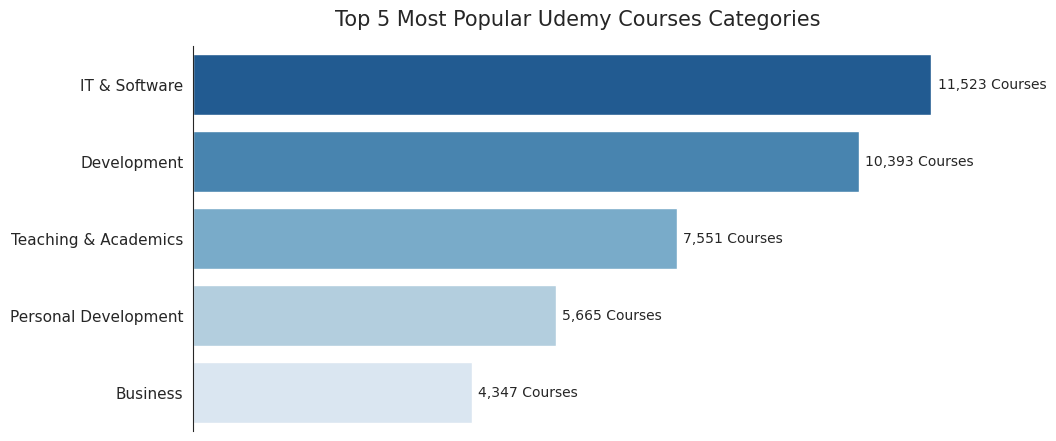

In [13]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the bar chart
sns.barplot(x=top_five_categories["count"], y=top_five_categories["category"],
            palette="Blues_r", ax=ax)

# Adding text annotations to each bar showing the count of courses in each category
for i, count in enumerate(top_five_categories["count"]):
    ax.annotate(f"{count:,} Courses", xy=(count, i), xytext=(count + 100, i),
                ha="left", va="center")

# Setting the title and axis labels
ax.set_title("Top 5 Most Popular Udemy Courses Categories ", fontsize=15, pad=15)
ax.set_xlabel("")
ax.set_ylabel("")

# Removing the x-axis & y-axis tick labels
ax.set_xticklabels([])
ax.set_xticklabels([])

# Increasing the fontsize of the y-axis tick labels
ax.tick_params(axis="y", labelsize=11)

# Removing spines from the plot
sns.despine(bottom=True)

# Showing the plot
plt.show()

#### Calculating The Most Popular SubCategories

In [14]:
# Getting the top five most popular subcategories
top_five_subcategories = most_popular_categories[["subcategory", "count"]] \
                                             .drop_duplicates("subcategory")[:5]
# Taking a look at the top five subcategories
top_five_subcategories

,subcategory,count
0,Other IT & Software,11523
1,Web Development,10393
2,IT Certifications,10337
3,Language Learning,7551
4,Programming Languages,7027


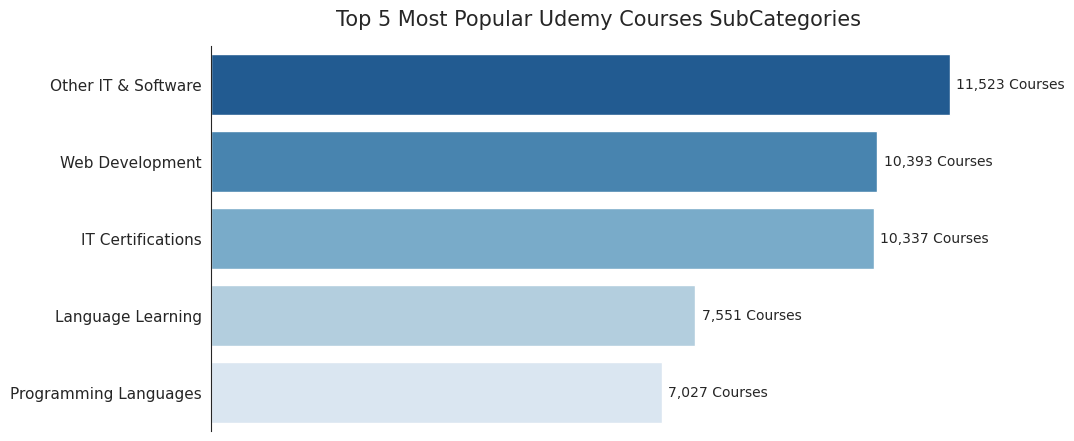

In [15]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the bar chart
sns.barplot(x=top_five_subcategories["count"], y=top_five_subcategories["subcategory"],
            palette="Blues_r", ax=ax)

# Adding text annotations to each bar showing the count of courses in each subcategory
for i, count in enumerate(top_five_subcategories["count"]):
    ax.annotate(f"{count:,} Courses", xy=(count, i), xytext=(count + 100, i),
                ha="left", va="center")

# Setting the title and axis labels
ax.set_title("Top 5 Most Popular Udemy Courses SubCategories", fontsize=15, pad=15)
ax.set_xlabel("")
ax.set_ylabel("")

# Removing the x-axis & y-axis tick labels
ax.set_xticklabels([])
ax.set_xticklabels([])

# Increasing the fontsize of the y-axis tick labels
ax.tick_params(axis="y", labelsize=11)

# Removing spines from the plot
sns.despine(bottom=True)

# Showing the plot
plt.show()

---

### 1.1. What is the most Popular Course in each category?

In [16]:
def find_most_popular_courses(df, popularity_metric="num_subscribers", top_n=1):
    """
    Find the most popular courses in a DataFrame, sorted by the specified popularity metric.
    """
    
    # Grouping the data by category and sort within each category based on popularity_metric
    sorted_data = df.sort_values(by=popularity_metric, ascending=False).groupby("category")

    # Selecting the top N courses within each category
    return sorted_data.head(top_n)

In [17]:
# Using the `find_most_popular_courses` function to get the most popular courses
most_popular_courses_df = find_most_popular_courses(df_courses)

# Showing the most popular courses and their "title", "category" and "num_subscribers"
most_popular_courses_df[["title","category", "num_subscribers"]].reset_index(drop=True) \
                                                                .sort_values("num_subscribers",
                                                                             ascending=False)

,title,category,num_subscribers
0,Java Tutorial for Complete Beginners,Development,1752364
1,Microsoft Excel - Excel from Beginner to Advanced,Office Productivity,1108811
2,The Complete Digital Marketing Course - 12 Courses in 1,Marketing,706339
3,Ultimate AWS Certified Solutions Architect Associate SAA-C03,IT & Software,640699
4,The Complete SQL Bootcamp 2022: Go from Zero to Hero,Business,574046
5,Adobe Photoshop CC: A Beginner to Advanced Photoshop Course,Design,510784
6,Adobe Premiere Pro CC Masterclass: Video Editing in Premiere,Photography & Video,436304
7,English Launch: Learn English for Free - Upgrade all areas,Teaching & Academics,360861
8,The Complete Financial Analyst Course 2022,Finance & Accounting,356765
9,Pianoforall - Incredible New Way To Learn Piano & Keyboard,Music,355854


---

## 2. Pricing Analysis 

### 2.1 What is the distribution of courses price?

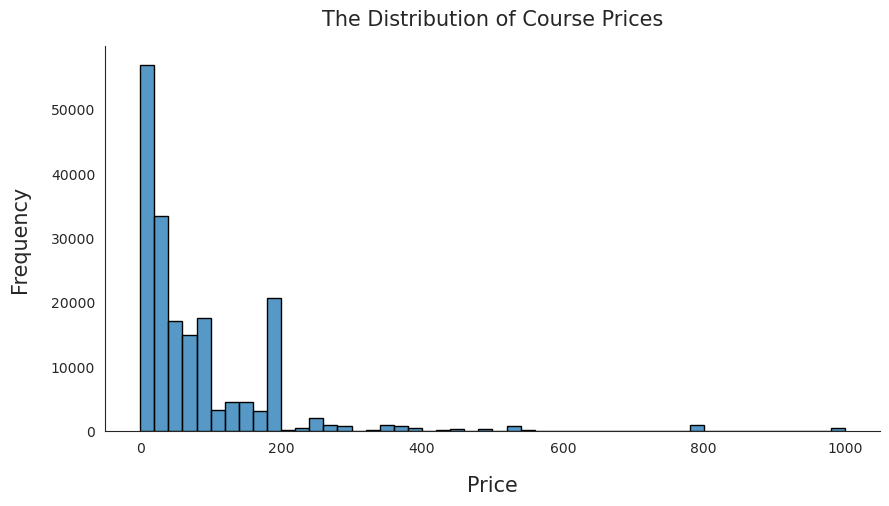

In [18]:
# Assuming you have already loaded your dataset into a dataframe called "df"
priced_courses = df_courses[df_courses["price"] > 0]

# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

sns.histplot(data=priced_courses, x="price", bins=50, edgecolor="black", ax=ax)

# Setting the title and axis labels
ax.set_title("The Distribution of Course Prices", fontsize=15, pad=15)
ax.set_xlabel("Price", fontsize=15, labelpad=15)
ax.set_ylabel("Frequency", fontsize=15, labelpad=15)

# Removing spines from the plot
sns.despine()

# Showing the plot
plt.show()

> The majority of courses are priced below 200 dollars, with a significant portion of them being offered for free. The number of courses significant decreases when moving past 200 dollars with only a couple of courses further the distribution on the 800 and 1000 dollars.

### 2.2. What is the percetange of courses that are priced below 200$ on udemy?

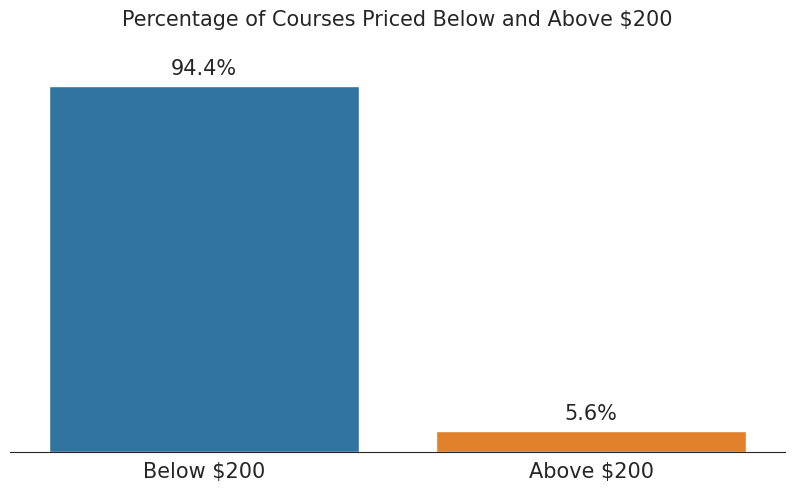

In [19]:
# Calculating the count of courses priced below and above 200
below_200_count = len(df_courses[df_courses["price"] < 200])
above_200_count = len(df_courses[df_courses["price"] >= 200])

# Calculating the percentage of courses priced below and above 200
total_count = below_200_count + above_200_count
below_200_percentage = (below_200_count / total_count) * 100
above_200_percentage = (above_200_count / total_count) * 100

# Creating a dataframe for the percentages
percentage_data = pd.DataFrame({"Price Range": ["Below $200", "Above $200"],
                                "Percentage": [below_200_percentage, above_200_percentage]})

# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the bar chart using Seaborn
sns.barplot(data=percentage_data, x="Price Range", y="Percentage")

# Adding percentage annotations with increased font size and bold
for i, percentage in enumerate(percentage_data["Percentage"]):
    ax.annotate(f"{percentage:.1f}%", xy=(i, percentage), xytext=(0, 5),
                textcoords="offset points", ha="center", va="bottom", fontsize=15)
    
# Setting the title and axis labels
ax.set_title("Percentage of Courses Priced Below and Above $200", fontsize=15, pad=30)
ax.set_xlabel("")
ax.set_ylabel("")

# Removing the Y-axis tick labels
ax.set_yticklabels([])

# Increasing the fontsize of the y-axis tick labels
ax.tick_params(axis="x", labelsize=15)

# Removing spines from the plot
sns.despine(left=True)

# Showing the plot
plt.show()

---

## 3. Instructor Performance

### 3.1. Who are the top 5 most performing instructors according to the number of subscribers?

In [20]:
# Grouping the dataframe by instructor name and calculate the total number of subscribers for each instructor
instructor_subscriber_counts = df_courses.groupby("instructor_name")["num_subscribers"].sum()

# Sorting the instructor subscriber counts in descending order
sorted_instructor_subscribers = instructor_subscriber_counts.sort_values(ascending=False)

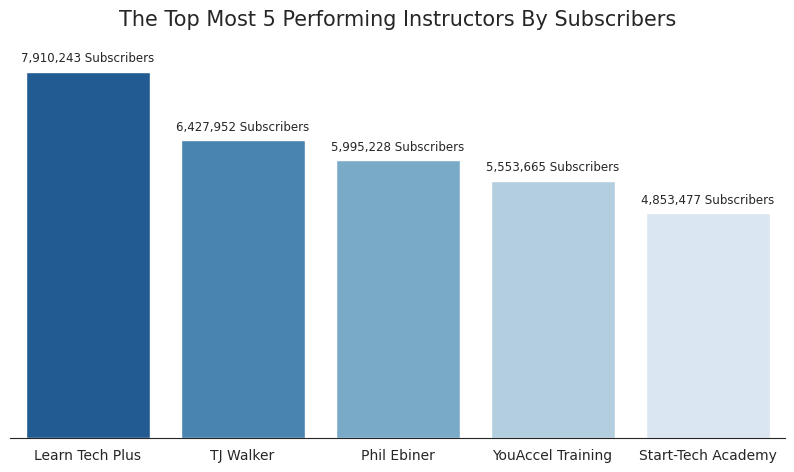

In [21]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

top_five_instructors = sorted_instructor_subscribers[:5]

# Plotting the bar chart
sns.barplot(y=top_five_instructors.values, x=top_five_instructors.index, palette="Blues_r", ax=ax)

# Adding percentage annotations with increased font size and bold
for i, count in enumerate(top_five_instructors.values):
    ax.annotate(f"{count:,} Subscribers", xy=(i, count), xytext=(0, 5),
                textcoords="offset points", ha="center", va="bottom", fontsize=8.5)

# Setting the title and axis labels
ax.set_title("The Top Most 5 Performing Instructors By Subscribers", fontsize=15, pad=20)
ax.set_xlabel("")
ax.set_ylabel("")

# Removing the y-axis tick labels
ax.set_yticklabels([])

# Removing spines from the plot
sns.despine(left=True)

# Showing the plot
plt.show()

### 3.2. Who are the top most 5 experienced instructors in terms of (Courses published  on Udemy)?

In [22]:
# Grouping the dataframe by instructor name and calculate the number of courses taught by each instructor
instructor_experience = df_courses.groupby("instructor_name")["id"].count().reset_index()

# Renaming the id column to num_courses
instructor_experience = instructor_experience.rename(columns={"id": "num_courses"})

# Sorting the dataframe by the descending order to get the topmost 5 experienced instructors
instructor_experience.sort_values("num_courses", ascending=False).reset_index(drop=True)[:5]

,instructor_name,num_courses
0,Packt Publishing,1254
1,Bluelime Learning Solutions,422
2,Illumeo Learning,410
3,Laurence Svekis,327
4,Infinite Skills,323


---

## 4. Time Analysis

### 4.1 How was the growth of Subscribers over Time on Udemy?

In [23]:
# Set the "published_time" column as the index
df_time = df_courses.set_index("published_time")
# Resample the data to a monthly frequency and calculate the sum of subscribers for each month
monthly_subscribers = df_time["num_subscribers"].resample("M").sum()

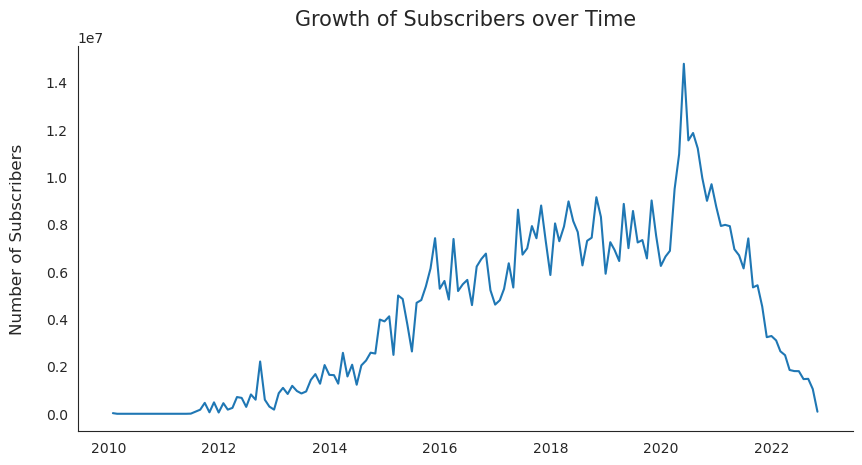

In [24]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Plotting the line plot using seaborn
sns.lineplot(x=monthly_subscribers.index, y=monthly_subscribers.values)

# Set the title and axis labels
ax.set_title("Growth of Subscribers over Time", fontsize=15, pad=15)
ax.set_ylabel("Number of Subscribers", fontsize=12, labelpad=15)
ax.set_xlabel("")

# Remove spines from the plot
sns.despine()

# Show the plot
plt.show()

> The analysis of the subscriber growth trend reveals a consistent upward trajectory starting from early 2013, peaking in 2020, and subsequently experiencing a significant decline in early 2021. This observation highlights a substantial surge in subscriber numbers over the years, followed by a notable contraction in the most recent period.

### 4.2 What was the year that had the most subsribers?

In [25]:
# Extracting the year from the "published_time" column
df_year = df_courses.copy()
df_year["year"] = df_year["published_time"].dt.year

# Calculating the total subscribers for each year
yearly_subscribers = df_year.groupby("year")["num_subscribers"].sum().reset_index() 

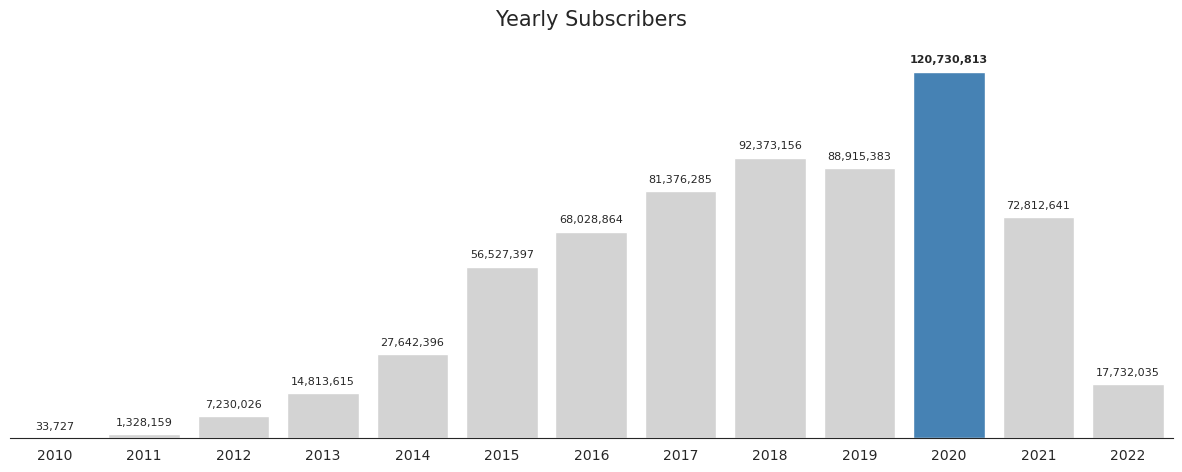

In [26]:
# Setting the plot's figure size
fig, ax = plt.subplots(figsize=(15, 5))

# Plotting the bar chart with all bars gray
sns.barplot(x=yearly_subscribers["year"], y=yearly_subscribers["num_subscribers"], color="lightgray", ax=ax)

# Finding the index of the highest number of subscribers
max_subscribers_index = yearly_subscribers["num_subscribers"].idxmax()

# Highlighting the bar with the highest number of subscribers in steelblue
ax.patches[max_subscribers_index].set_facecolor("steelblue")

# Adding percentage annotations with increased font size and bold
for i, count in enumerate(yearly_subscribers["num_subscribers"]):
    ax.annotate(f"{count:,}", xy=(i, count), xytext=(0, 5),
                textcoords="offset points", ha="center", va="bottom", fontsize=8, 
                fontweight="bold" if i == max_subscribers_index else "normal")

# Setting the title and axis labels
ax.set_title("Yearly Subscribers", fontsize=15, pad=20)
ax.set_xlabel("")
ax.set_ylabel("")

# Removing the y-axis tick labels
ax.set_yticklabels([])

# Removing spines from the plot
sns.despine(left=True)

# Showing the plot
plt.show()

# Conclusion

The analysis of the Udemy Courses Comments dataset highlights key insights. IT & Software, Development, Teaching & Academics, Personal Development, and Business emerged as popular course categories. Subcategories like Other IT & Web Development, IT Certifications, Language Learning, and Programming Languages also gained traction. 

The "Java Tutorial for Complete Beginners" course in the Development category had the highest number of subscribers (1,752,367).

Approximately 94.4% of courses are priced below 200 dollars, indicating affordability and accessibility. Top-performing instructors by subscriber count include Learn Tech Plus, TJ Walker, Phil Ebiner, YouAccel Tanning, and Star-Tech Academy. 

In terms of experience, Packet Publishing, Bluelime Learning Solutions, lllumeo Learning, Laurence Svekis, and Infinite Skills published the most courses.

The time analysis reveals consistent subscriber growth, peaking in 2020 but declining in early 2021. Notably, 2020 had the highest number of subscribers, with approximately 120,730,813 users.

These findings showcase the popularity of online learning, the diversity of course categories, and the influence of pricing, instructor performance, and temporal trends on user engagement. 

These insights provide valuable information for Udemy and its stakeholders, emphasizing the platform's impact in facilitating accessible education and fostering a thriving online learning community.


## Findings Summary

1. IT & software, Development, Teaching & Academics, Personal Development and Business are the most popular courses categories on Udemy.


2. Other IT &, Web Development, IT Certifications, Language Learning and Programming Languages are the most popular courses subcategories on Udemy.


3. Java Tutorial for Complete Beginners in the Development category in the most popular course in Udemy with 1,752,367 subscribers on Udemy.


4. About 94.4% of courses are priced below 200 dollars.


5. Learn Tech Plus, TJ Walker, Phil Ebiner, YouAccel Tanning and Star-Tech Academy are the topmost 5 performing instructors by subscribers on Udemy.


6. Packet Publishing, Bluelime Learning Soultions, lllumeo Learning, Laurence Svekis and Infinite Skills are the top 5 most experienced instructors in term of number of courses published on Udemy. 


7. There is a consistent upward trajectory starting from early 2013, peaking in 2020, and subsequently experiencing a significant decline in early 2021.


8. Year 2020 is the year that Udemy got the most subscribers in, about 120,730,813 users subscribed that year.

# Recommendations for Udemy Stockholders

- Capitalize on the popularity of IT & Software, Development, Teaching & Academics, Personal Development, and Business categories by investing in targeted marketing campaigns to attract more learners to these high-demand courses.

- Collaborate with instructors who have excelled in delivering courses in the most popular subcategories, such as Other IT & Web Development, IT Certifications, Language Learning, and Programming Languages, to create specialized programs and further expand the course offerings in these areas.

- Analyze the pricing structure of courses priced below 200 dollars, which constitute the majority of courses, to ensure optimal revenue generation while maintaining affordability. Consider introducing pricing tiers or bundles to encourage learners to enroll in multiple courses.

- Recognize and incentivize top-performing instructors, such as Learn Tech Plus, TJ Walker, Phil Ebiner, YouAccel Tanning, and Star-Tech Academy, by offering them opportunities to create exclusive content, collaborate on promotional activities, or participate in instructor development programs to further enhance the quality and reputation of the platform.

- Capitalize on the strong growth observed in 2020, the year with the highest number of subscribers, by leveraging the marketing strategies and content trends that contributed to this success. Additionally, closely monitor the decline in early 2021 and investigate potential factors that may have impacted subscriber growth to devise strategies for recovery.